Muhamad Fauzi Akbar 202331192 PEMBELAJARAN MESIN D

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

1. Mengimport library panda dan numpy : untuk membaca, meproses dan memanipulasi data
2. Mengimport Matplotlib.pyplot : untuk visualisasi data hasil clustering
3. Mengimport KMeans : untuk melakukan pengelompokan data menjadi beberapa cluster berdasarkan kesamaan
4. Mengimport StandardScaler : untuk menormalisasi data dengan tujuan fiturnya memiliki skala yang sama supaya tidak ada fitur yang mendominasi

In [22]:
file_path = 'sales(in).csv'
data = pd.read_csv(file_path)

1. Membaca file CSV yang berisi data
2. Mengubah data dari bentuk csv ke bentuk tabular agar mudah diolah

In [25]:
print("Dataset preview:")
print(data.head())

Dataset preview:
  Product_Code  W0  W1  W2  W3  W4  W5  W6  W7  W8  ...  Normalized 42  \
0           P1  11  12  10   8  13  12  14  21   6  ...           0.06   
1           P2   7   6   3   2   7   1   6   3   3  ...           0.20   
2           P3   7  11   8   9  10   8   7  13  12  ...           0.27   
3           P4  12   8  13   5   9   6   9  13  13  ...           0.41   
4           P5   8   5  13  11   6   7   9  14   9  ...           0.27   

   Normalized 43  Normalized 44  Normalized 45  Normalized 46  Normalized 47  \
0           0.22           0.28           0.39           0.50           0.00   
1           0.40           0.50           0.10           0.10           0.40   
2           1.00           0.18           0.18           0.36           0.45   
3           0.47           0.06           0.12           0.24           0.35   
4           0.53           0.27           0.60           0.20           0.20   

   Normalized 48  Normalized 49  Normalized 50  Normalize

untuk melihat 5 baris pertama dari data supaya kita bisa tahu apa isinya

In [28]:
selected_columns = ['W0', 'W1', 'W2', 'W3', 'W4', 'W5', 'W6', 'W7', 'W8']
if not all(col in data.columns for col in selected_columns):
    raise ValueError(f"Kolom {selected_columns} tidak ditemukan dalam dataset.")

X = data[selected_columns]

kode ini dugunakna untuk memilih kolom yang akan kita analisis dan di buat kluster, disini kita memilih W1-W8, Dan kita juga akan memerika apakah kolom kolom tersebut benar2 ada didalam dataset

In [31]:
print("\nJumlah nilai kosong pada setiap kolom:")
print(X.isnull().sum())


Jumlah nilai kosong pada setiap kolom:
W0    0
W1    0
W2    0
W3    0
W4    0
W5    0
W6    0
W7    0
W8    0
dtype: int64


disini kita menggunakan print(X.isnull().sum()) untuk memerika jumlah nilai kosong pada kolom dataset

In [34]:
X.fillna(X.mean(), inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_5212\642802493.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


Kode ini digunakan untuk megnsi nilai kosong dengan rata rata dari masing masing kolom

In [37]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

disini kita membuat standar agar data yang kita punya memiliki rata-rata 0 dan standar deviasi 1, nantinya kita akan menggunakan untuk si algoritma K-meansnya


In [40]:
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

disini kita menggunakan metode elbow untuk mencari sebenarnya berapa jumlah cluster yang efektif pada saat penggunaan K-means nanti, caranya sendiri adalah dengan mengukur inertia (yaitu jarak data ke pusat klusternya) untuk beberapa jumlah kluster yang kita jadikan opsi

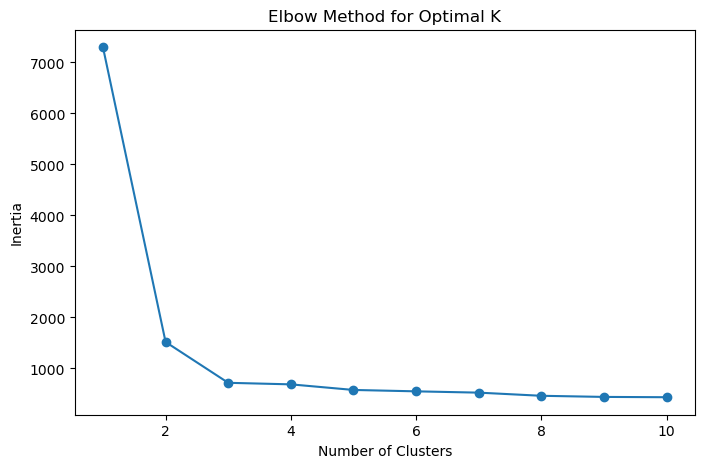

In [43]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

memvisualisasikan grafik untuk menentukan nilai k yang efektif, menggunakan motode elbow

In [45]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

disini kita menetapkan bahwa cluster yang akan dibuat adalah 3 cluster dan melatih model K-means dengan data yang sudah kita standarisasi

In [48]:
data['Cluster'] = kmeans.labels_

kode ini sendiri kita gunakan untuk membuat kolom baru yang isinya hanyalah label klaster untuk setiap data dalam dataset

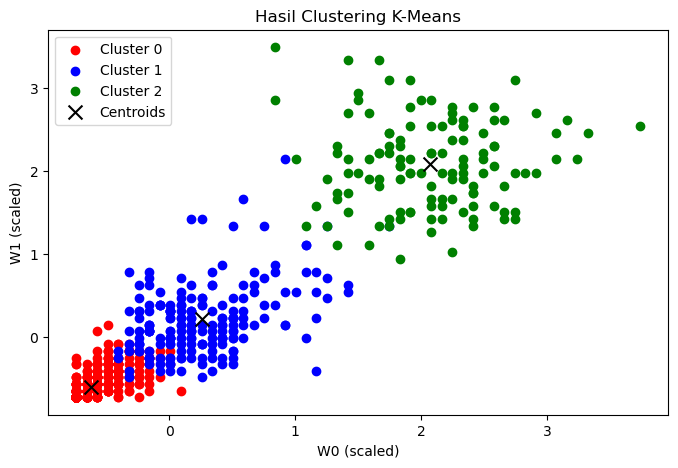

In [50]:
plt.figure(figsize=(8, 5))
colors = ['red', 'blue', 'green']
for i in range(3):
    cluster_data = X_scaled[kmeans.labels_ == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=colors[i], label=f'Cluster {i}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', marker='x', s=100, label='Centroids')
plt.title('Hasil Clustering K-Means')
plt.xlabel('W0 (scaled)')
plt.ylabel('W1 (scaled)')
plt.legend()
plt.show()

ini adalah visualisasi dari clusteringnya, tadi kita bikin 3 cluster, nah disini kita bisa lihat ada 3 jenis cluster dan centroidnya masing masing